# **Dynamic PTT Analysis: Leveraging External Data for Smarter Investment Decisions**

© *Copyright 2023, 2603498 Data Science Practicum Semester Project* 



*This project is property of*
- *Kittipon Rakwong*
- *Sakkrapop Jetiyanon*
- *Rinrada Punsiri*
- *Punyaporn Srisukwat*

# *Descriptions*
- Led a dynamic PTT stock analysis project that incorporated external data such as gold and oil prices, EMA50, EMA100 , and historical prices to inform smarter investment decisions.
- Conducted rigorous research and analysis on external factors that impact PTT's stock price, identifying key trends and correlations to enhance the accuracy of the model.
- Leveraged machine learning algorithms and statistical techniques to build a predictive model that forecasted PTT's future performance and provided valuable insights to investors.
- Developed interactive visualizations and dashboards using Python and Tableau to communicate the model's findings and inform investment strategies.
- Achieved significant improvement in prediction accuracy compared to traditional methods, providing clients with valuable insights into the factors driving PTT's stock price and enabling more informed investment decisions.

# Importing data & libraries

In [1]:
!pip install --upgrade --no-cache-dir gdown -q
import gdown
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import statsmodels.formula.api as smf
#plt.style.use('fivethirtyeight')

In [2]:
# Loading Data
!gdown 19dViJLAO4b8mrrJuBijX_nIGgIE7gYIR

Downloading...
From: https://drive.google.com/uc?id=19dViJLAO4b8mrrJuBijX_nIGgIE7gYIR
To: /content/allfeaturesinstockmodel.csv
100% 738k/738k [00:00<00:00, 127MB/s]


In [3]:
df = pd.read_csv('allfeaturesinstockmodel.csv') # all cleaned data with factors related to PTT stock price
print(df.shape)
df.head()

(3481, 27)


,Date,usd,Price_Oil,Open,High,Low,Close_PTT,Adj_Close,Volume,Close_gold,...,Price_Gold,Open_THB,High_THB,Low_THB,Deposit_rate,diffdeposit,Close_pttep,Close_top,EMA_50,EMA_100
0,4/16/2012,118.23,4082.4819,34.299999,34.500000,34.200001,34.400002,22.328007,18237000,1649.7,...,24889.20531,25023.36367,25106.88132,24748.09095,3.0,0.0,174.5,68.50,34.868195,34.450000
1,4/17/2012,117.41,4054.1673,34.700001,34.700001,33.500000,33.500000,21.743851,53394000,1651.1,...,24912.75454,24948.74339,25075.72468,24668.03832,3.0,0.0,173.0,68.25,34.814540,34.431188
2,4/18/2012,115.18,3977.1654,34.099998,34.500000,34.099998,34.299999,22.263102,40707000,1639.6,...,24793.06747,24907.41903,25048.42793,24686.90230,3.0,0.0,175.0,68.75,34.794362,34.428591
3,4/19/2012,117.00,4040.0100,34.400002,35.099998,34.299999,35.099998,22.782358,44852000,1641.4,...,24841.19882,24845.28540,25081.19188,24650.06080,3.0,0.0,175.5,70.00,34.806348,34.441886
4,4/20/2012,118.08,4077.3024,35.099998,35.500000,35.000000,35.400002,22.977081,32882000,1642.8,...,24866.41176,24867.63508,24986.10996,24767.50749,3.0,0.0,175.5,69.75,34.829628,34.460858


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3481 non-null   object 
 1   usd           3481 non-null   float64
 2   Price_Oil     3481 non-null   float64
 3   Open          3481 non-null   float64
 4   High          3481 non-null   float64
 5   Low           3481 non-null   float64
 6   Close_PTT     3481 non-null   float64
 7   Adj_Close     3481 non-null   float64
 8   Volume        3481 non-null   int64  
 9   Close_gold    3481 non-null   float64
 10  Open_gold     3481 non-null   float64
 11  High_gold     3481 non-null   float64
 12  Low_gold      3481 non-null   float64
 13  Close_usd     3481 non-null   float64
 14  Open_usd      3481 non-null   float64
 15  High_usd      3481 non-null   float64
 16  Low_usd       3481 non-null   float64
 17  Price_Gold    3481 non-null   float64
 18  Open_THB      3481 non-null 

# Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Price (THB)')

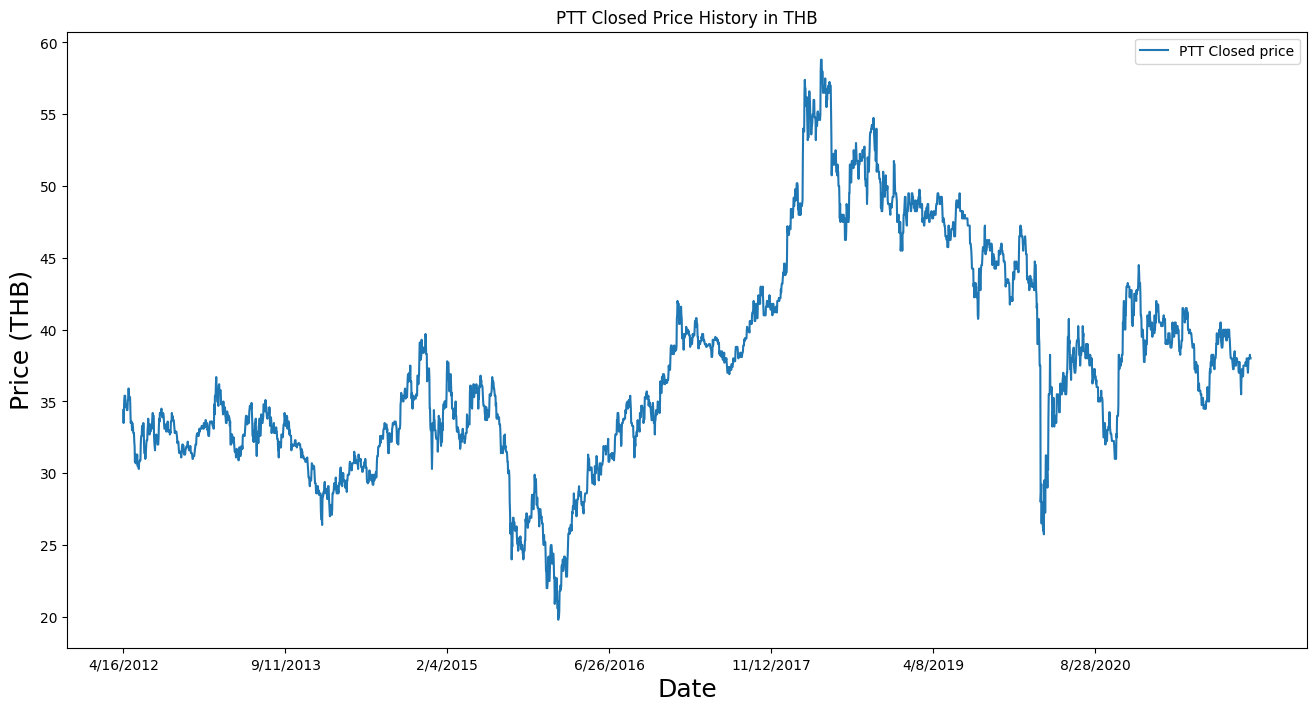

In [5]:
# Plot the PTT Closed Price
plt.figure(figsize = (16,8))
plt.title('PTT Closed Price History in THB')
plt.plot(df['Date'], df['Close_PTT'],label='PTT Closed price')
plt.xticks(np.arange(0,len(df), 500), df['Date'][0:len(df):500])
plt.legend()
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price (THB)',fontsize=18)

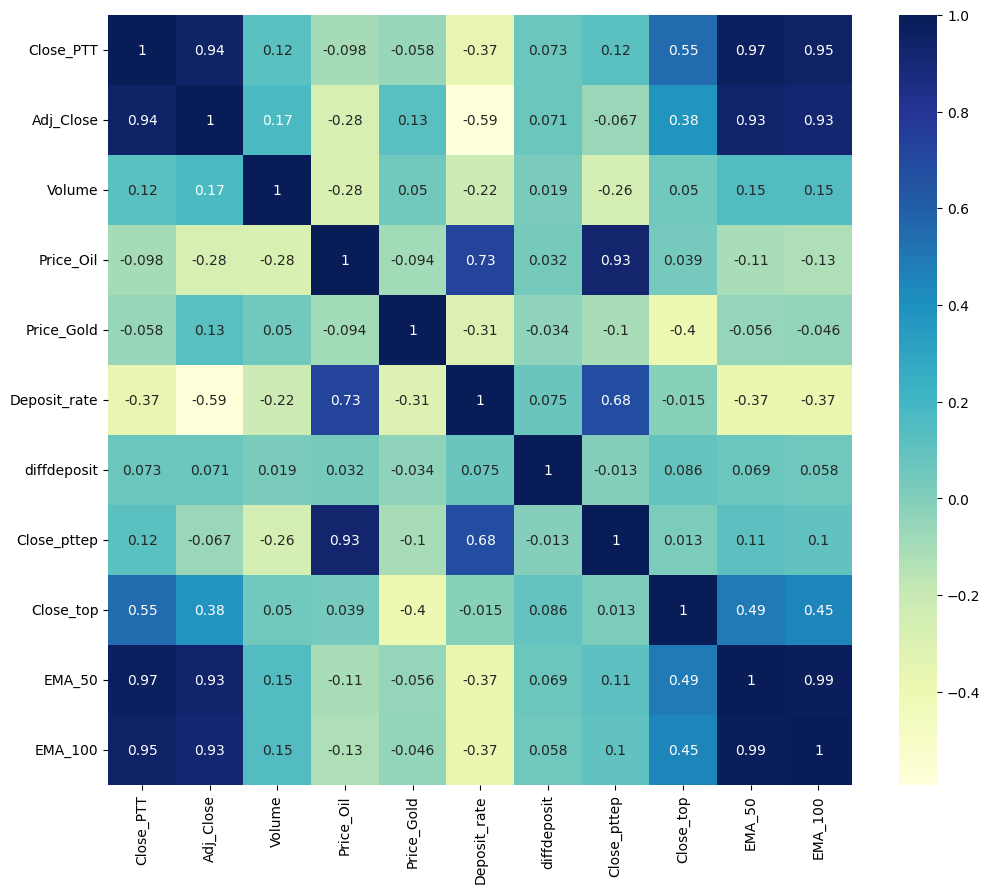

In [6]:
plt.figure(figsize=(12,10))
cor = df[['Close_PTT','Adj_Close','Volume','Price_Oil','Price_Gold','Deposit_rate','diffdeposit','Close_pttep','Close_top','EMA_50','EMA_100']].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [7]:
cor.sort_values(by='Close_PTT',ascending=False)['Close_PTT']

Close_PTT       1.000000
EMA_50          0.972724
EMA_100         0.950756
Adj_Close       0.944458
Close_top       0.546731
Volume          0.122869
Close_pttep     0.121589
diffdeposit     0.072778
Price_Gold     -0.057971
Price_Oil      -0.097707
Deposit_rate   -0.365638
Name: Close_PTT, dtype: float64

## Compare **Close_PTT** to **Close_TOP**

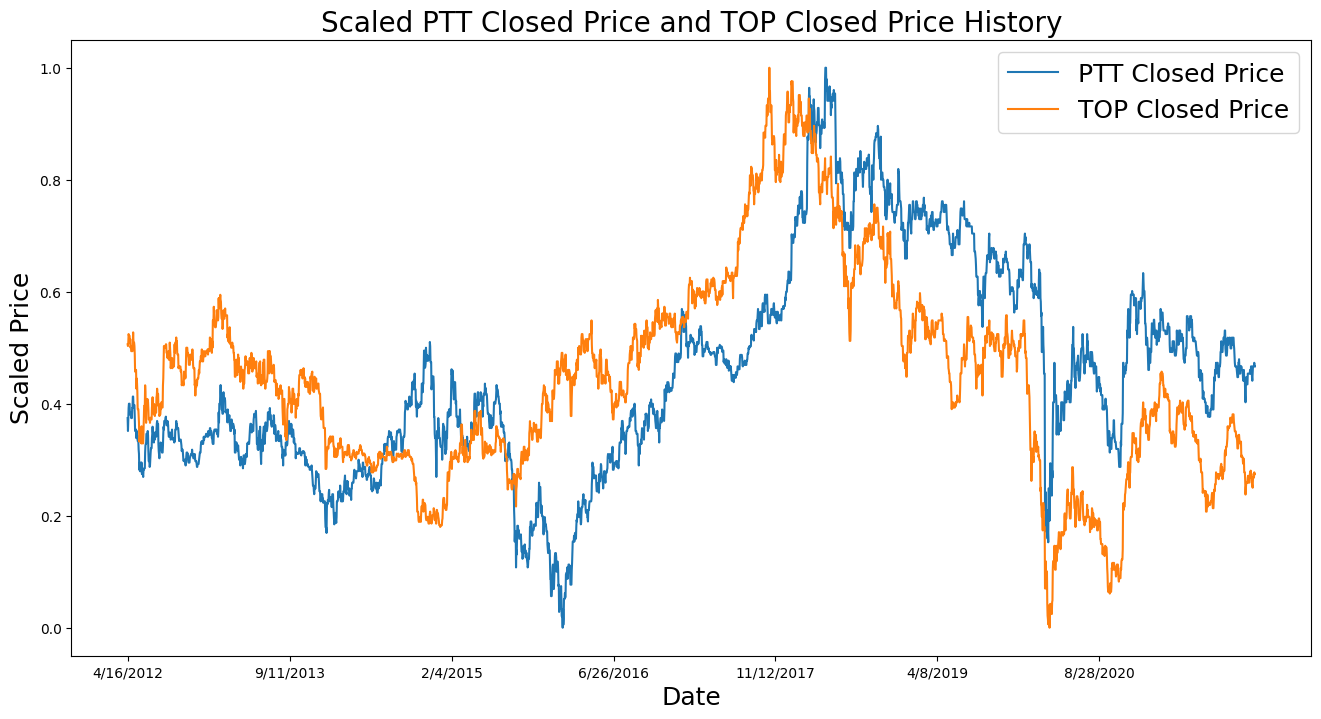

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit and transform the data using MinMaxScaler
df_scaled = scaler.fit_transform(df[['Close_PTT', 'Close_top']])

# create the plot
plt.figure(figsize=(16,8))
plt.title('Scaled PTT Closed Price and TOP Closed Price History', fontsize=20)
plt.plot(df['Date'], df_scaled[:,0], label='PTT Closed Price')
plt.plot(df['Date'], df_scaled[:,1], label='TOP Closed Price')
plt.xticks(np.arange(0,len(df),500), df['Date'][0:len(df):500])
plt.legend(fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Price', fontsize=18)

plt.show()


## Compare **Gold Price** to **Close PTT price**

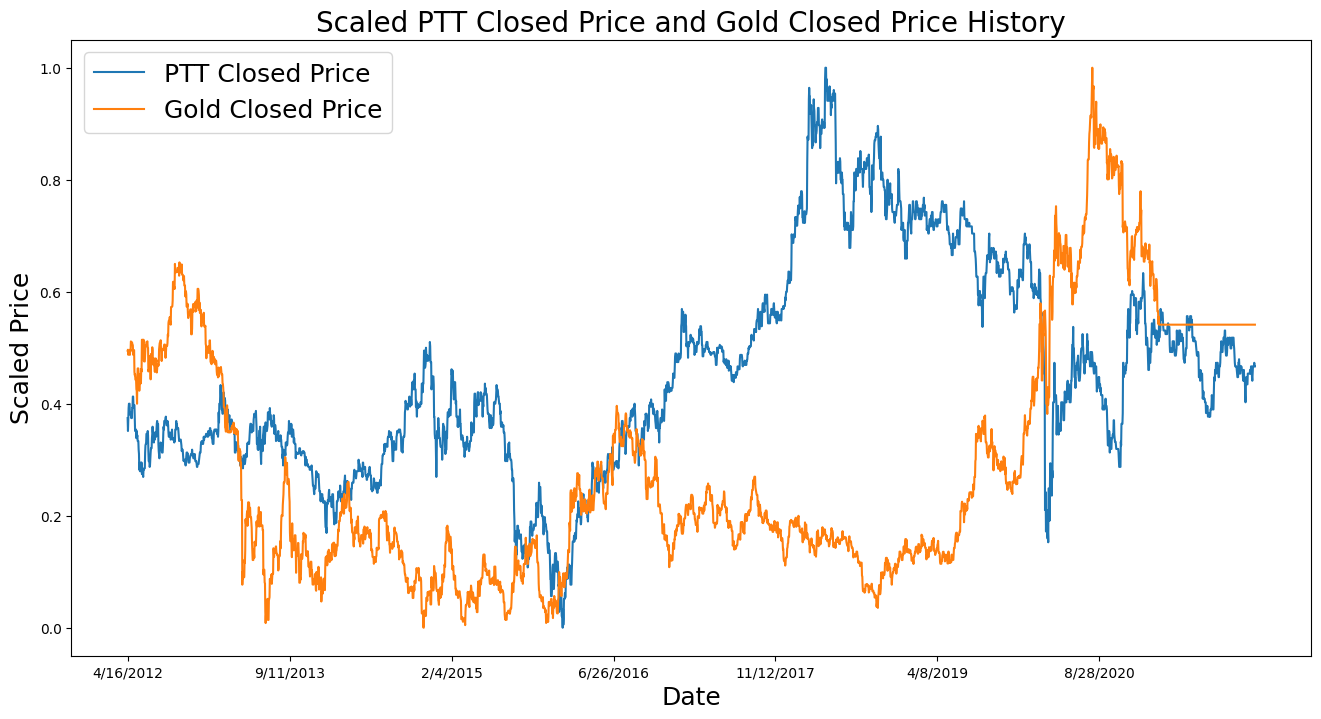

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit and transform the data using MinMaxScaler
df_scaled = scaler.fit_transform(df[['Close_PTT', 'Price_Gold']])

# create the plot
plt.figure(figsize=(16,8))
plt.title('Scaled PTT Closed Price and Gold Closed Price History', fontsize=20)
plt.plot(df['Date'], df_scaled[:,0], label='PTT Closed Price')
plt.plot(df['Date'], df_scaled[:,1], label='Gold Closed Price')
plt.xticks(np.arange(0,len(df),500), df['Date'][0:len(df):500])
plt.legend(fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Price', fontsize=18)

plt.show()


## Compare **Oil Price** to **Close PTT price**

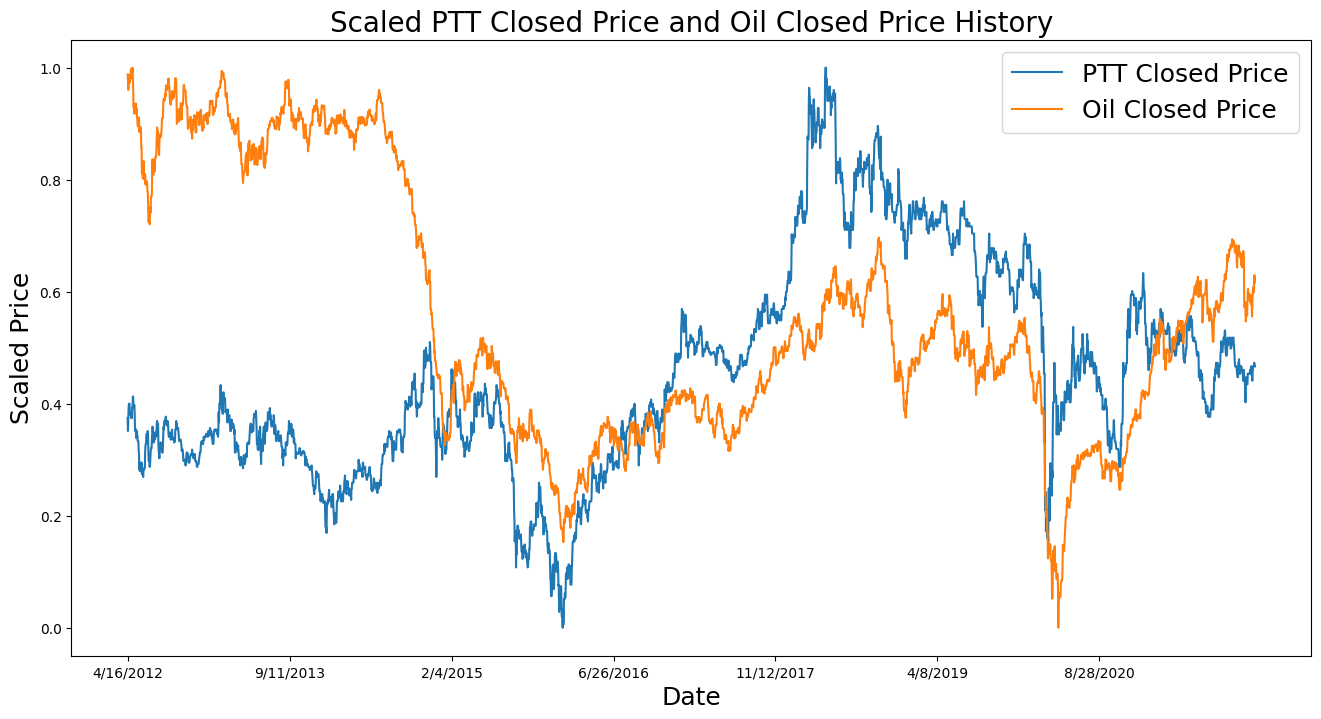

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit and transform the data using MinMaxScaler
df_scaled = scaler.fit_transform(df[['Close_PTT', 'Price_Oil']])

# create the plot
plt.figure(figsize=(16,8))
plt.title('Scaled PTT Closed Price and Oil Closed Price History', fontsize=20)
plt.plot(df['Date'], df_scaled[:,0], label='PTT Closed Price')
plt.plot(df['Date'], df_scaled[:,1], label='Oil Closed Price')
plt.xticks(np.arange(0,len(df),500), df['Date'][0:len(df):500])
plt.legend(fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Price', fontsize=18)

plt.show()

## What if we concatenate the features?

In [11]:
df['oilplusgold'] = df['Price_Oil'] * df['Price_Gold']
df.head()

,Date,usd,Price_Oil,Open,High,Low,Close_PTT,Adj_Close,Volume,Close_gold,...,Open_THB,High_THB,Low_THB,Deposit_rate,diffdeposit,Close_pttep,Close_top,EMA_50,EMA_100,oilplusgold
0,4/16/2012,118.23,4082.4819,34.299999,34.500000,34.200001,34.400002,22.328007,18237000,1649.7,...,25023.36367,25106.88132,24748.09095,3.0,0.0,174.5,68.50,34.868195,34.450000,1.016097e+08
1,4/17/2012,117.41,4054.1673,34.700001,34.700001,33.500000,33.500000,21.743851,53394000,1651.1,...,24948.74339,25075.72468,24668.03832,3.0,0.0,173.0,68.25,34.814540,34.431188,1.010005e+08
2,4/18/2012,115.18,3977.1654,34.099998,34.500000,34.099998,34.299999,22.263102,40707000,1639.6,...,24907.41903,25048.42793,24686.90230,3.0,0.0,175.0,68.75,34.794362,34.428591,9.860613e+07
3,4/19/2012,117.00,4040.0100,34.400002,35.099998,34.299999,35.099998,22.782358,44852000,1641.4,...,24845.28540,25081.19188,24650.06080,3.0,0.0,175.5,70.00,34.806348,34.441886,1.003587e+08
4,4/20/2012,118.08,4077.3024,35.099998,35.500000,35.000000,35.400002,22.977081,32882000,1642.8,...,24867.63508,24986.10996,24767.50749,3.0,0.0,175.5,69.75,34.829628,34.460858,1.013879e+08


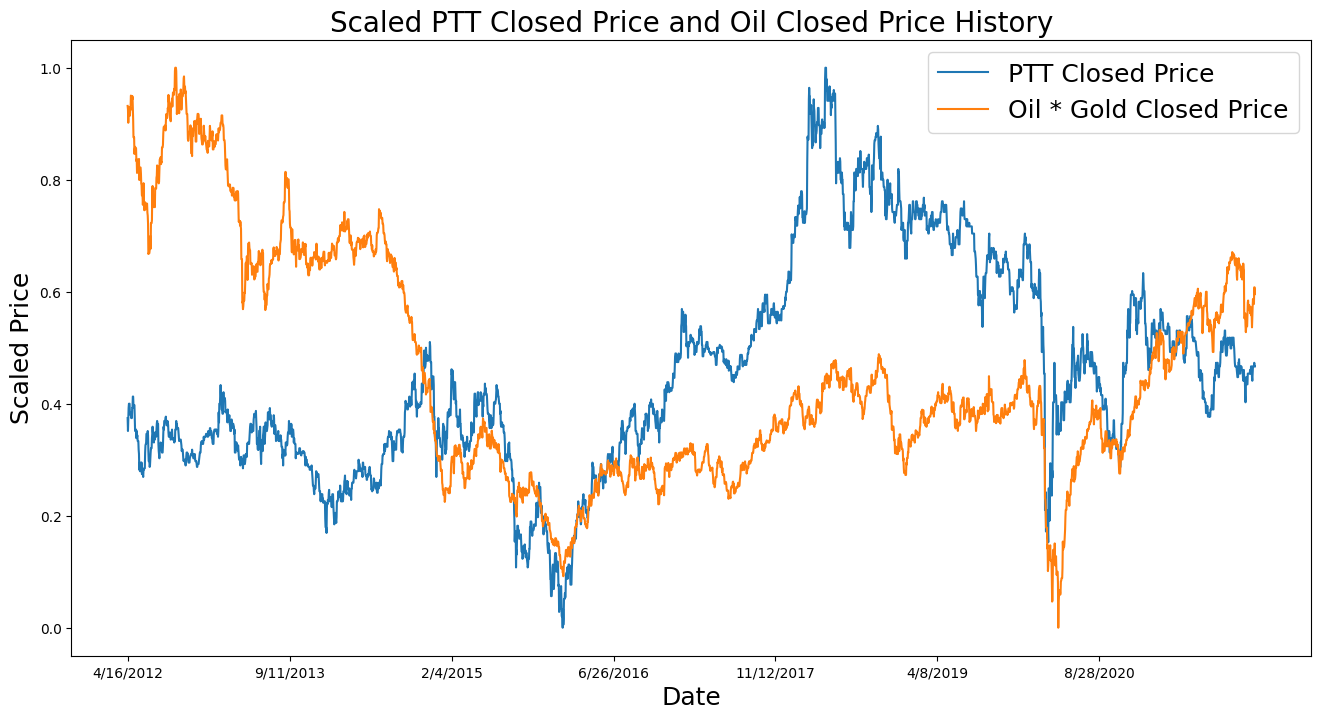

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit and transform the data using MinMaxScaler
df_scaled = scaler.fit_transform(df[['Close_PTT', 'oilplusgold']])

# create the plot
plt.figure(figsize=(16,8))
plt.title('Scaled PTT Closed Price and Oil Closed Price History', fontsize=20)
plt.plot(df['Date'], df_scaled[:,0], label='PTT Closed Price')
plt.plot(df['Date'], df_scaled[:,1], label='Oil * Gold Closed Price')
plt.xticks(np.arange(0,len(df),500), df['Date'][0:len(df):500])
plt.legend(fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Price', fontsize=18)

plt.show()

# Model Building

## Naive Model

A naive model for stock price prediction could be one that simply predicts that tomorrow's price will be the same as today's price. This model assumes that the stock prices follow a random walk, meaning that the future prices are unpredictable and depend solely on the current prices.

While this model is extremely naive and unrealistic, it can be a useful baseline to compare more sophisticated models to. If a more complex model cannot outperform this naive model, it may indicate that the problem is not well-suited for machine learning or that there is a fundamental issue with the dataset.

However, it's important to note that stock price prediction is a very challenging problem, and more sophisticated models such as time series analysis or deep learning approaches are often used to make more accurate predictions.

In [13]:
from sklearn.metrics import mean_squared_error
# Split the data into training and test sets
train_data = df.Close_PTT[:int(0.8*len(df))] 
test_data = df.Close_PTT[int(0.8*len(df)):] 

# Create a naive model that predicts the next data by using the average of the previous 30 data points
def naive_model(train_data):
    predictions = []
    for i in range(len(train_data)):
        if i < 30:
            predictions.append(train_data.iloc[i])
        else:
            predictions.append(sum(train_data.iloc[i-30:i])/30) # predict the next data by using the average of the previous 30 data points
    return predictions

# Test the model on the test data
predictions = naive_model(test_data)
mse = mean_squared_error(test_data, predictions[:len(test_data)])
print("MSE:", mse)

MSE: 5.621729634943408


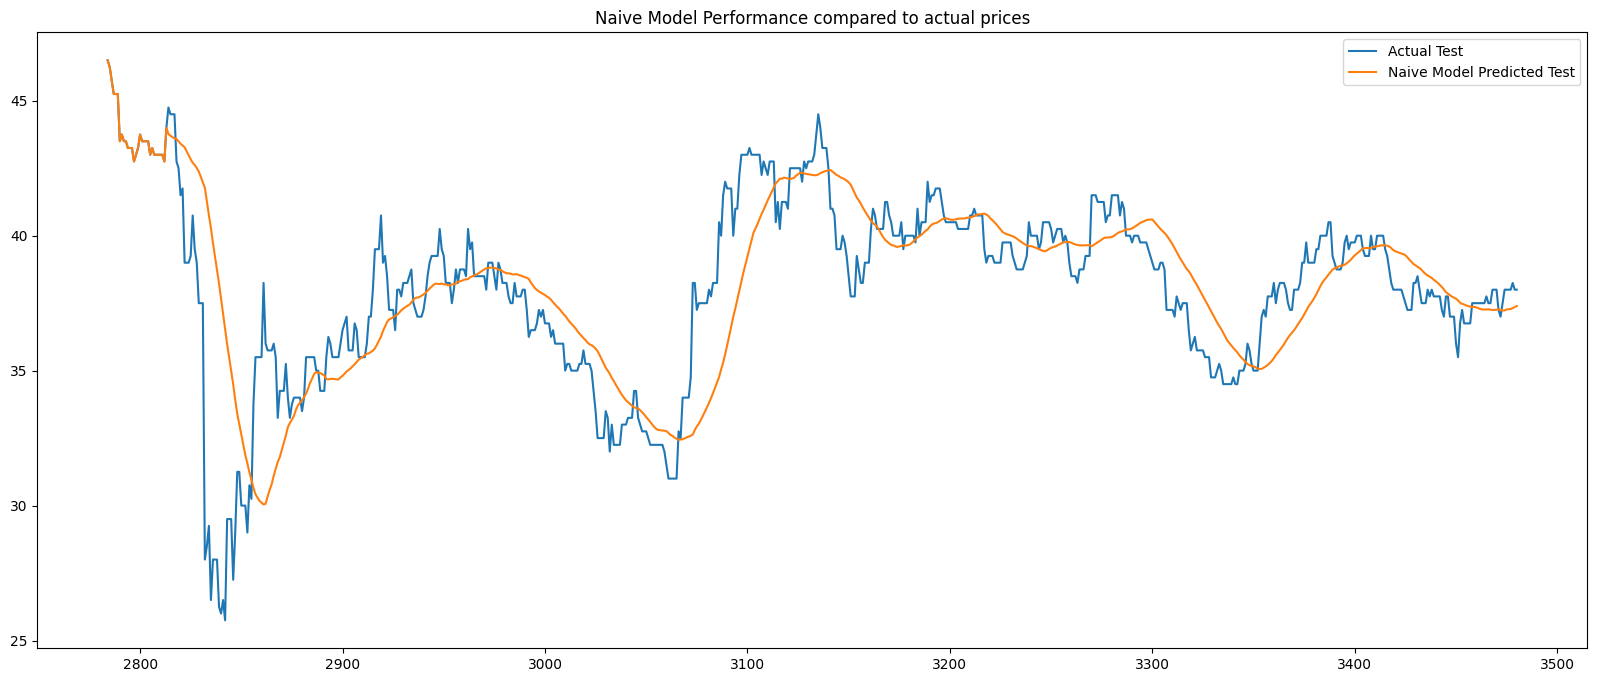

In [14]:
# Visualize the results with multiple features
plt.figure(figsize=(20,8))
plt.plot(range(len(train_data), len(train_data)+len(test_data)), test_data, label='Actual Test')
plt.plot(range(len(train_data), len(train_data)+len(test_data)), predictions[:len(test_data)], label='Naive Model Predicted Test')
plt.title('Naive Model Performance compared to actual prices')
plt.legend()
plt.show()

## Model Building for Stock Price Prediction (Baseline Validation Performance)
- ARIMA
- LSTM
- XGBoost

###**ARIMA**

ARIMA models are commonly used in the field of stock price predictions, as they are effective in capturing the trends and patterns in historical stock prices and using that information to make future predictions.

ARIMA models can be used to forecast the future prices of individual stocks, as well as the overall performance of stock indices. The accuracy of the predictions depends on the quality and quantity of historical data, as well as the assumptions made about the underlying processes driving the stock prices.

In [15]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-16-52ad8a786750>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


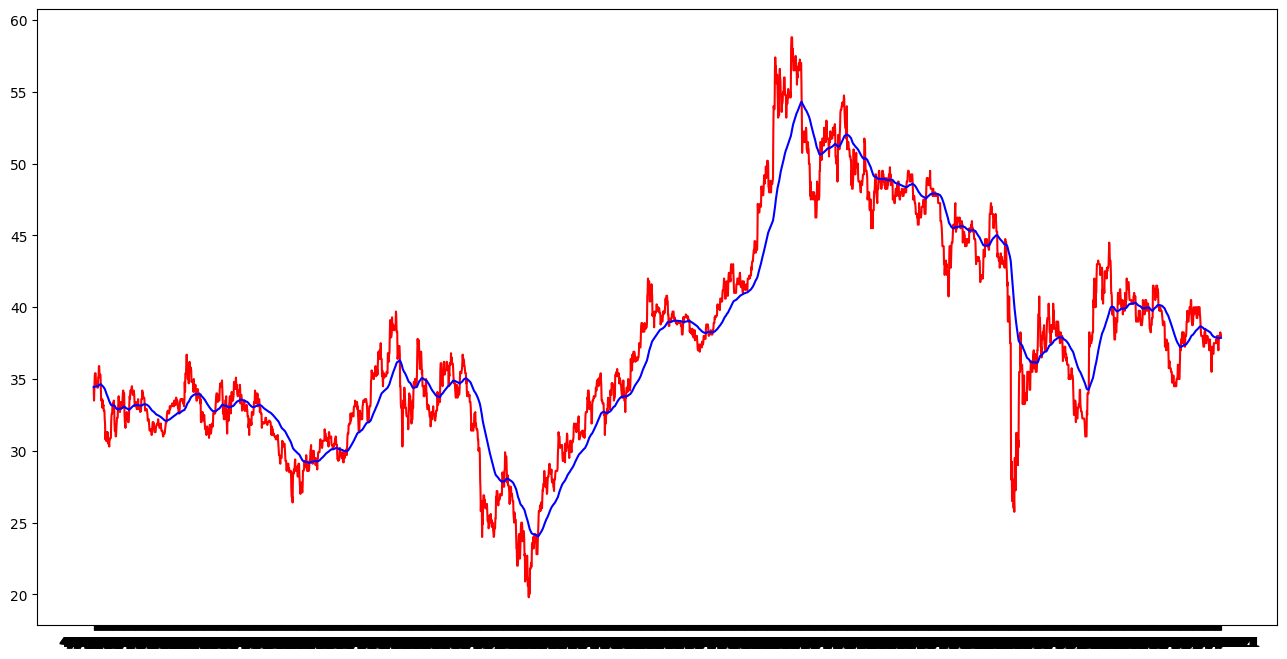

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_PTT'],color='r')
plt.plot(df['Date'],df['EMA_100'],color='b')
plt.show()

In [19]:
model = smf.ols(formula='Close_PTT ~ EMA_100', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_PTT   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 3.274e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:46:19   Log-Likelihood:                -7803.7
No. Observations:                3481   AIC:                         1.561e+04
Df Residuals:                    3479   BIC:                         1.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0574      0.211      0.272      0.7

In [20]:
model = smf.ols(formula='Close_PTT ~ Price_Oil + Price_Gold + Deposit_rate + EMA_100 + EMA_50 + Close_pttep + Close_top + oilplusgold', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_PTT   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:46:19   Log-Likelihood:                -5644.5
No. Observations:                3481   AIC:                         1.131e+04
Df Residuals:                    3472   BIC:                         1.136e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5784      0.587     -6.093   

In [25]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
training_data = train_data['Close_PTT'].values
exog_train = train_data[['oilplusgold', 'Deposit_rate', 'EMA_100', 'Close_pttep', 'Close_top','EMA_50','High','Low','Price_Oil','Low_gold']].values
exog_test = test_data[['oilplusgold', 'Deposit_rate', 'EMA_100', 'Close_pttep', 'Close_top','EMA_50','High','Low','Price_Oil','Low_gold']].values
history = [x for x in training_data]

In [26]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Auto ARIMA to select optimal ARIMA parameters
from pmdarima.arima import auto_arima

model = auto_arima(df['Close_PTT'], seasonal=False, trace=True)
print(model.summary())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.8 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5566.457, Time=7.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5569.116, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5568.550, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5568.571, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5567.129, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5571.347, Time=2.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5572.548, Time=1.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5568.621, Time=9.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5568.607, Time=8.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5570.516, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5571.734, Time=2.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5574.501, T

In [27]:
test_real_data=[]
N_test_observations = len(test_data)
# initialize and fit the model outside the loop
model = ARIMA(train_data['Close_PTT'], exog=exog_train, order=(0,1,0))
model_fit = model.fit()

# initialize model_predictions as a numpy array
model_predictions = np.zeros(N_test_observations)

for time_point in range(N_test_observations):
    # forecast using the pre-fit model
    output = model_fit.forecast(exog=exog_test[time_point].reshape(1, -1))
    yhat = output
    
    # append the prediction to the numpy array
    model_predictions[time_point] = yhat
    
    # update history with true value
    true_test_value = test_data.iloc[time_point]['Close_PTT']
    test_real_data.append(true_test_value)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
# Evaluate
# Get the root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(test_data['Close_PTT'],model_predictions,squared=False)
print(f'Root mean squared error : {rmse}')

# Get the root mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(test_data['Close_PTT'],model_predictions)
print(f'mean absolute error : {mae}')

from sklearn.metrics import r2_score
r2 = r2_score(test_data['Close_PTT'],model_predictions)
print(f'R-squared score : {r2}')

Root mean squared error : 1.7052386026364643
mean absolute error : 1.3175978174796172
R-squared score : 0.7424053979582277


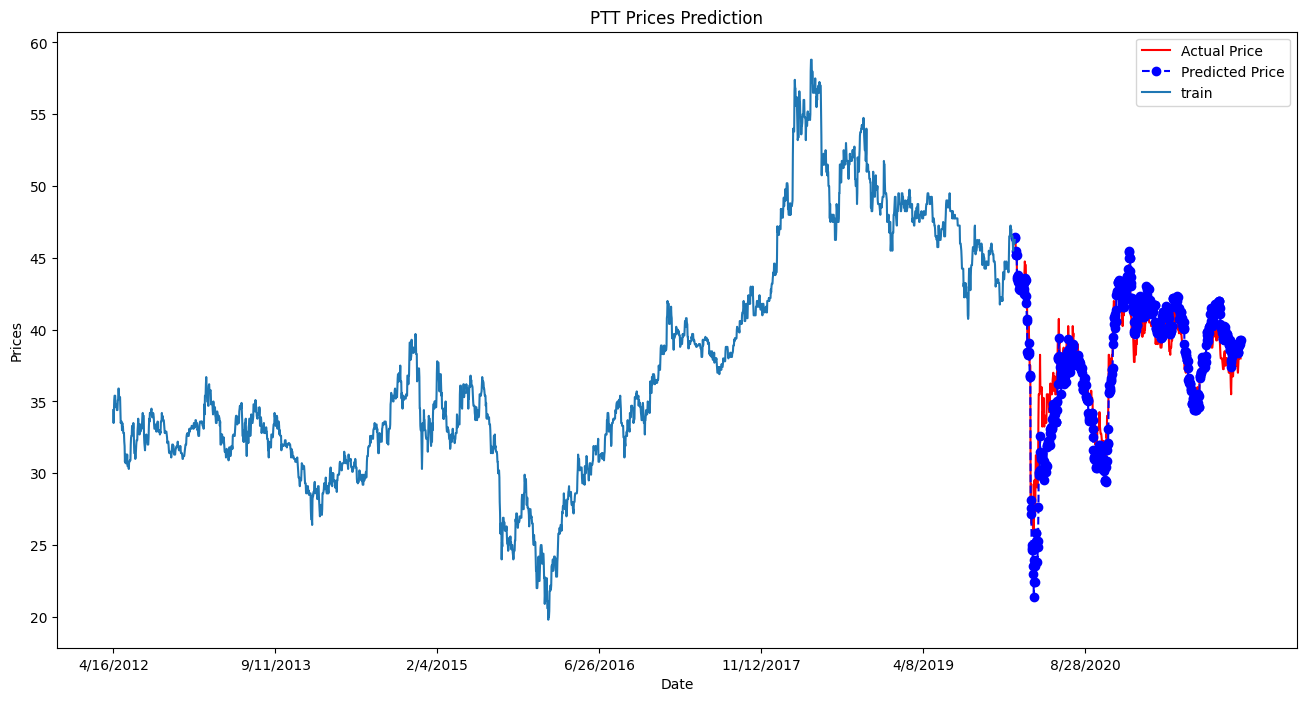

In [29]:
test_set_range = df[int(len(df)*0.8):].index
train_set_range = df[:int(len(df)*0.8)].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range, test_real_data, color='red', label='Actual Price')
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(train_set_range,training_data,label='train')
plt.xticks(np.arange(0,len(df), 500), df['Date'][0:len(df):500])
plt.title('PTT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

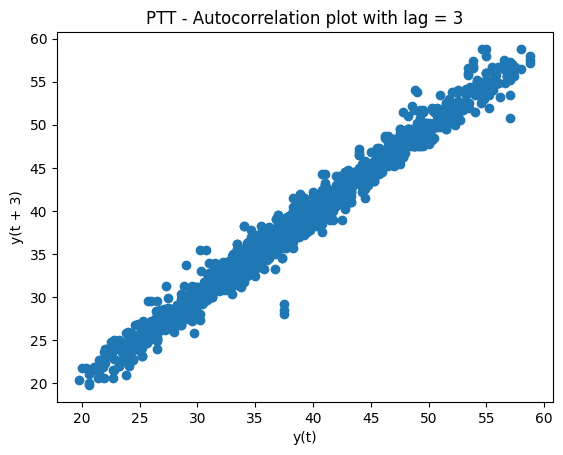

In [30]:
plt.figure()
lag_plot(df['Close_PTT'], lag=3)
plt.title('PTT - Autocorrelation plot with lag = 3')
plt.show()

### **LSTM (Long Short-Term Memory)**
LSTM stands for Long Short-Term Memory. It is a type of recurrent neural network (RNN) architecture that is designed to overcome the vanishing gradient problem in traditional RNNs. LSTM networks are commonly used for sequence prediction problems and have been applied in various fields such as natural language processing, speech recognition, and stock market prediction.

Consider the previous price of Close_PTT only

In [31]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close_PTT'])
# Convert the dataframe into a numpy array 
dataset = data.values
# Get the number of rows to train the model on (train 80%, test 20%)
train_size = .8
training_data_len = math.ceil(len(dataset) * train_size)

training_data_len

2785

In [32]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [33]:
# Create the training dataset from scaled data
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

look_back = 60

for i in range(look_back,len(train_data)):
    # x_train.append(train_data[i-look_back:i, :])
    x_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i, 0])

    if i <= look_back:
        print(x_train)
        print(y_train)
        print('-'*10)

[array([0.37435905, 0.35128208, 0.37179487, 0.39230767, 0.40000008,
       0.40000008, 0.40000008, 0.38205133, 0.38461538, 0.37948715,
       0.38205133, 0.37435905, 0.37435905, 0.37435905, 0.39230767,
       0.39230767, 0.41282059, 0.41282059, 0.3974359 , 0.3974359 ,
       0.3974359 , 0.3974359 , 0.3769231 , 0.35128208, 0.35384613,
       0.35384613, 0.35384613, 0.33846156, 0.35128208, 0.34102562,
       0.34358979, 0.33333333, 0.33333333, 0.33333333, 0.31794877,
       0.31025644, 0.28205128, 0.29487179, 0.27948723, 0.27948723,
       0.27948723, 0.29487179, 0.27948723, 0.29487179, 0.274359  ,
       0.274359  , 0.274359  , 0.274359  , 0.26923077, 0.28205128,
       0.28205128, 0.28461541, 0.28461541, 0.28461541, 0.31282054,
       0.32564105, 0.3282051 , 0.3282051 , 0.34615385, 0.34615385])]
[0.34615384615384615]
----------


In [34]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mean_squared_error')
# Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

2725/2725 [==============================] - 112s 39ms/step - loss: 0.0015


In [36]:
# Create the testing datasets
test_data = scaled_data[training_data_len - look_back:, :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(look_back,len(test_data)):
    x_test.append(test_data[i-look_back:i,0])

# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# Get the models predicted price values
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

22/22 [==============================] - 1s 16ms/step


In [37]:
# Evaluate
# Get the root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(y_test,y_pred,squared=False)
print(f'Root mean squared error : {rmse}')

# Get the root mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(y_test,y_pred)
print(f'mean absolute error : {mae}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f'r2 score : {r2}')

Root mean squared error : 1.1152657690334808
mean absolute error : 0.7114388422034252
r2 score : 0.888964544232546


<ipython-input-38-9cb77938ebe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


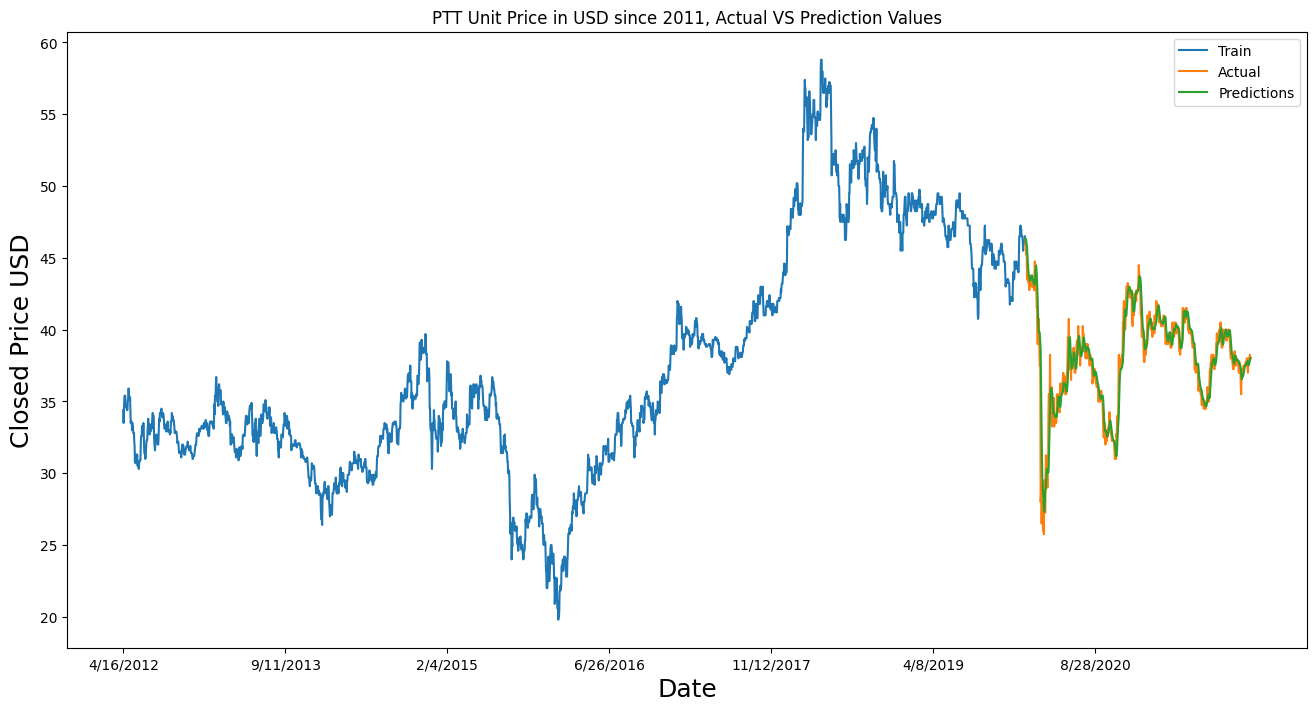

In [38]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred
train_set_range = df[0:int(len(df)*train_size)+1].index
test_set_range = df[int(len(df)*train_size)+1:].index

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('PTT Unit Price in USD since 2011, Actual VS Prediction Values')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closed Price USD',fontsize=18)
plt.plot(train_set_range,train['Close_PTT'],label='training data')
plt.plot(test_set_range,valid[['Close_PTT','Predictions']])
plt.xticks(np.arange(0,len(df), 500), df['Date'][0:len(df):500])
plt.legend(['Train','Actual','Predictions'])
plt.show()

### **LSTM** for multiple features

In the context of stock price prediction, LSTM can be trained on historical stock prices, as well as other relevant features such as economic indicators, news sentiment, and technical indicators, to predict future stock prices. LSTM is well-suited to this task because it can capture the non-linear and complex relationships between these features and stock prices over time.

Overall, LSTM has shown promise in stock price prediction tasks and has been used in various applications for predicting the movement of stock prices. However, it is important to note that stock price prediction is a challenging task due to the unpredictable nature of the stock market, and many external factors that can impact stock prices.

In [39]:
from sklearn.preprocessing import MinMaxScaler
# Preprocess the data with multiple features
scaler = MinMaxScaler(feature_range=(0,1))
data = pd.DataFrame({})
features = ['Close_PTT','EMA_50','EMA_100','Close_pttep','Close_top','Price_Oil','High','Low','Low_gold','Deposit_rate','oilplusgold']
data[features] = scaler.fit_transform(df[features])

In [40]:
data

,Close_PTT,EMA_50,EMA_100,Close_pttep,Close_top,Price_Oil,High,Low,Low_gold,Deposit_rate,oilplusgold
0,0.374359,0.362632,0.344020,0.963504,0.506098,0.987868,0.363868,0.382586,0.594460,1.0,0.931776
1,0.351282,0.361022,0.343399,0.952555,0.503049,0.980444,0.368957,0.364116,0.587684,1.0,0.925681
2,0.371795,0.360416,0.343313,0.967153,0.509146,0.960254,0.363868,0.379947,0.590574,1.0,0.901728
3,0.392308,0.360776,0.343752,0.970803,0.524390,0.976732,0.379135,0.385224,0.583699,1.0,0.919260
4,0.400000,0.361474,0.344379,0.970803,0.521341,0.986510,0.389313,0.403694,0.591072,1.0,0.929556
...,...,...,...,...,...,...,...,...,...,...,...
3476,0.466667,0.446068,0.456473,0.547445,0.268293,0.598642,0.459288,0.476253,0.651654,0.0,0.578080
3477,0.466667,0.446483,0.456569,0.547445,0.268293,0.598642,0.459288,0.476253,0.651654,0.0,0.578080
3478,0.473077,0.447176,0.456826,0.554745,0.277439,0.629335,0.459288,0.476253,0.651654,0.0,0.607942
3479,0.466667,0.447547,0.456914,0.551095,0.274390,0.629153,0.465649,0.482850,0.651654,0.0,0.607766


In [41]:
# Split the data into training and test sets
train_size = int(len(data) * 0.8)
look_back = 60
train_df = data[:train_size]
test_df = data[train_size - look_back:]

In [42]:
# Create sequences with multiple features
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

num_features = data.shape[1]
X_train, y_train = create_sequences(train_df[features].values, look_back)
X_test, y_test = create_sequences(test_df[features].values, look_back)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# LSTM Model
model = Sequential([
    LSTM(units=64, input_shape=(look_back, data.shape[1])),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam',loss='mean_squared_error')
# Train the model
model.fit(X_train,y_train, batch_size=1, epochs=1)

2724/2724 [==============================] - 45s 16ms/step - loss: 0.0382


In [44]:
# Make predictions with multiple features
y_pred = model.predict(X_test)

# Concatenate the predicted output with the original input data
y_pred = np.concatenate([y_pred,X_test[:,0,1:]],axis=1)

print(y_pred.shape)
print(y_test.shape)

22/22 [==============================] - 1s 10ms/step
(697, 11)
(697, 11)


In [45]:
# Apply inverse transform to get actual values
y_train = scaler.inverse_transform(y_train)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [46]:
# create a dataframe from the dictionary
compared = pd.DataFrame({'y_pred': y_pred[:,0], 'y_test': y_test[:,0]})
print(compared)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test[:,0],y_pred[:,0]))

        y_pred  y_test
0    41.747306   46.50
1    41.755791   46.25
2    41.696447   45.75
3    41.422244   45.25
4    41.159569   45.25
..         ...     ...
692  37.316317   38.00
693  37.368292   38.00
694  37.397141   38.25
695  37.527894   38.00
696  37.608975   38.00

[697 rows x 2 columns]
6.518153590928471


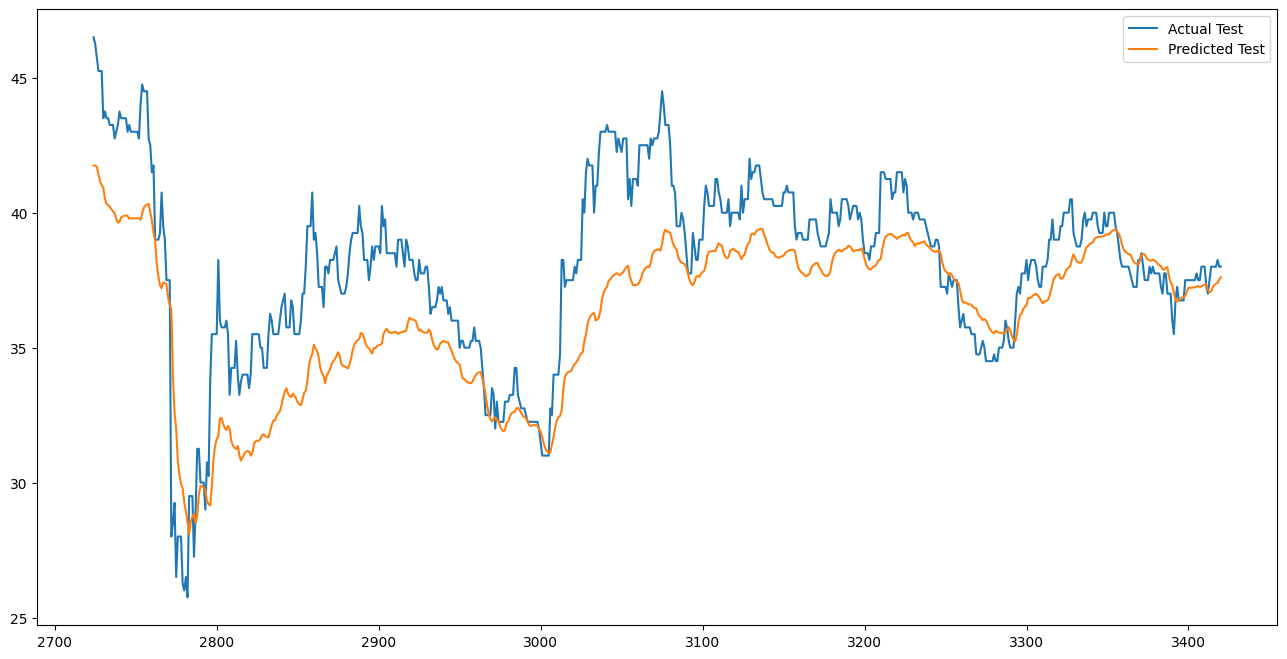

In [47]:
# Visualize the predicted results 
plt.figure(figsize=(16,8))
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test[:,0], label='Actual Test')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_pred[:,0], label='Predicted Test')
plt.legend()
plt.show()

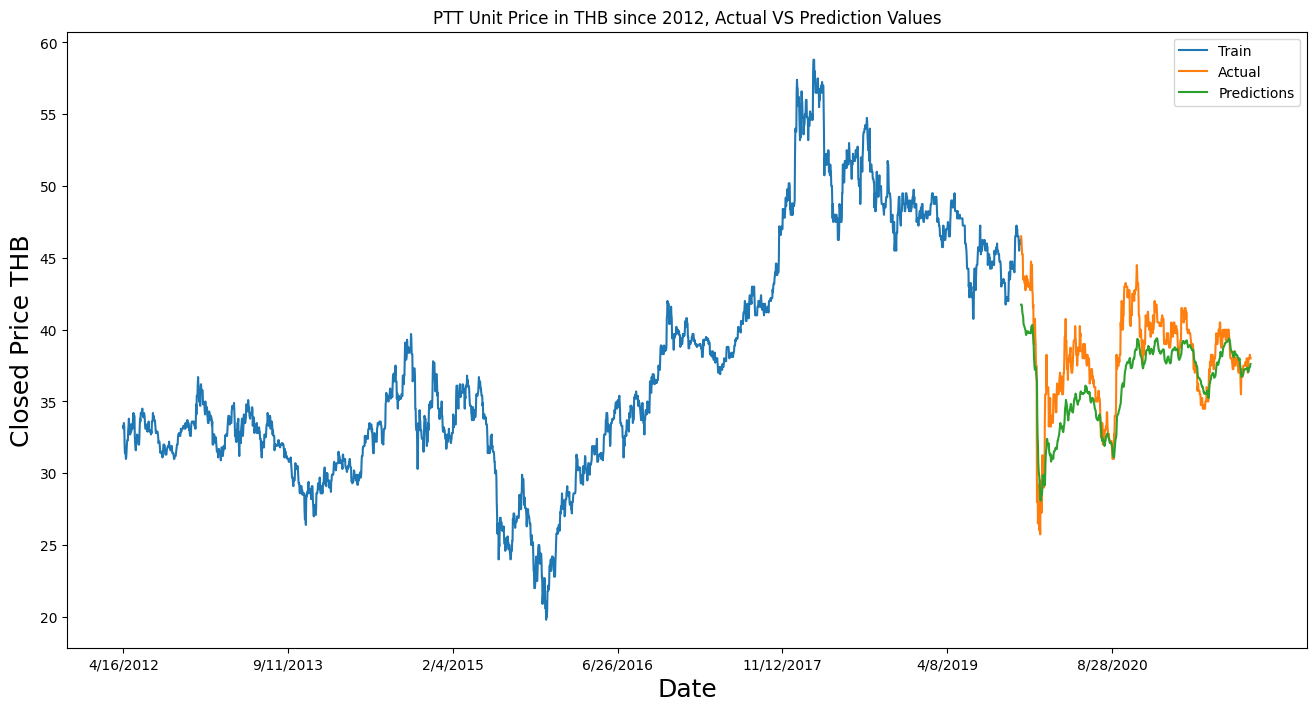

In [48]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('PTT Unit Price in THB since 2012, Actual VS Prediction Values')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closed Price THB',fontsize=18)
plt.plot(np.arange(len(y_train)),y_train[:,0],label='training data')
plt.plot(np.arange(len(y_train),len(y_train) + len(y_test)),y_test[:,0])
plt.plot(np.arange(len(y_train),len(y_train) + len(y_test)),y_pred[:,0])
plt.xticks(np.arange(0,len(df), 500), df['Date'][0:len(df):500])
plt.legend(['Train','Actual','Predictions'])
plt.show()

In [50]:
# Evaluate
# Get the root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(y_test[:,0],y_pred[:,0],squared=False)
print(f'Root mean squared error : {rmse}')

# Get the root mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(y_test[:,0],y_pred[:,0])
print(f'mean absolute error : {mae}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test[:,0],y_pred[:,0])
print(f'R-squared score : {r2}')

Root mean squared error : 2.5530674865597405
mean absolute error : 2.0515983481827327
R-squared score : 0.42258104448262135


### **XGBoost**

XGBoost (eXtreme Gradient Boosting) is a machine learning algorithm that has become popular for use in stock price predictions due to its ability to handle complex, non-linear relationships between variables and its powerful feature selection capabilities.

XGBoost works by iteratively adding decision trees to the model, with each subsequent tree attempting to correct the errors of the previous tree. The final prediction is the weighted sum of the predictions of all the trees.

In [51]:
# XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [52]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

X = df[['oilplusgold', 'Deposit_rate', 'EMA_100', 'EMA_50', 'Close_pttep', 'Close_top', 'High','Low', 'Low_gold']]  # drop the target column and non-numerical columns
X = X.select_dtypes(['number'])  # select only numerical columns
y = df['Close_PTT']

split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X.iloc[:split_index, :], X.iloc[split_index:, :]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Define the model
xgb_model = xgb.XGBRegressor(learning_rate=0.03, max_depth=10, n_estimators=200)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
next_30_predictions = xgb_model.predict(X_test)
next_30_predictions

array([46.097027, 46.352127, 45.55278 , 45.204697, 45.204697, 45.204697,
       44.087643, 43.344196, 43.351772, 43.34895 , 43.14679 , 43.14679 ,
       43.14679 , 42.562084, 42.43875 , 42.71776 , 43.282124, 43.304203,
       43.304203, 43.304203, 43.29555 , 43.086395, 43.117397, 43.027733,
       43.06069 , 43.067123, 43.067123, 42.80983 , 42.809593, 43.572147,
       44.271854, 44.145794, 44.145794, 44.145794, 42.92996 , 42.538597,
       41.567963, 41.500206, 38.92341 , 38.92341 , 38.92341 , 39.67974 ,
       39.924362, 39.333584, 39.329273, 37.78822 , 37.78822 , 37.78822 ,
       29.015896, 28.35504 , 28.88587 , 26.705725, 26.859097, 26.859097,
       26.859097, 26.668015, 26.112232, 25.857668, 25.19117 , 27.60697 ,
       27.60697 , 27.60697 , 26.642204, 28.207945, 30.587753, 30.703215,
       30.005486, 30.005486, 30.005486, 28.228937, 29.424591, 30.07777 ,
       31.891   , 34.386517, 34.386517, 34.386517, 34.386517, 37.373585,
       35.99359 , 35.488197, 35.488197, 35.488197, 

In [53]:
#test MSE
MSE_error = mean_squared_error(test_data['Close_PTT'], next_30_predictions)
MSE_error

0.2046882647797975

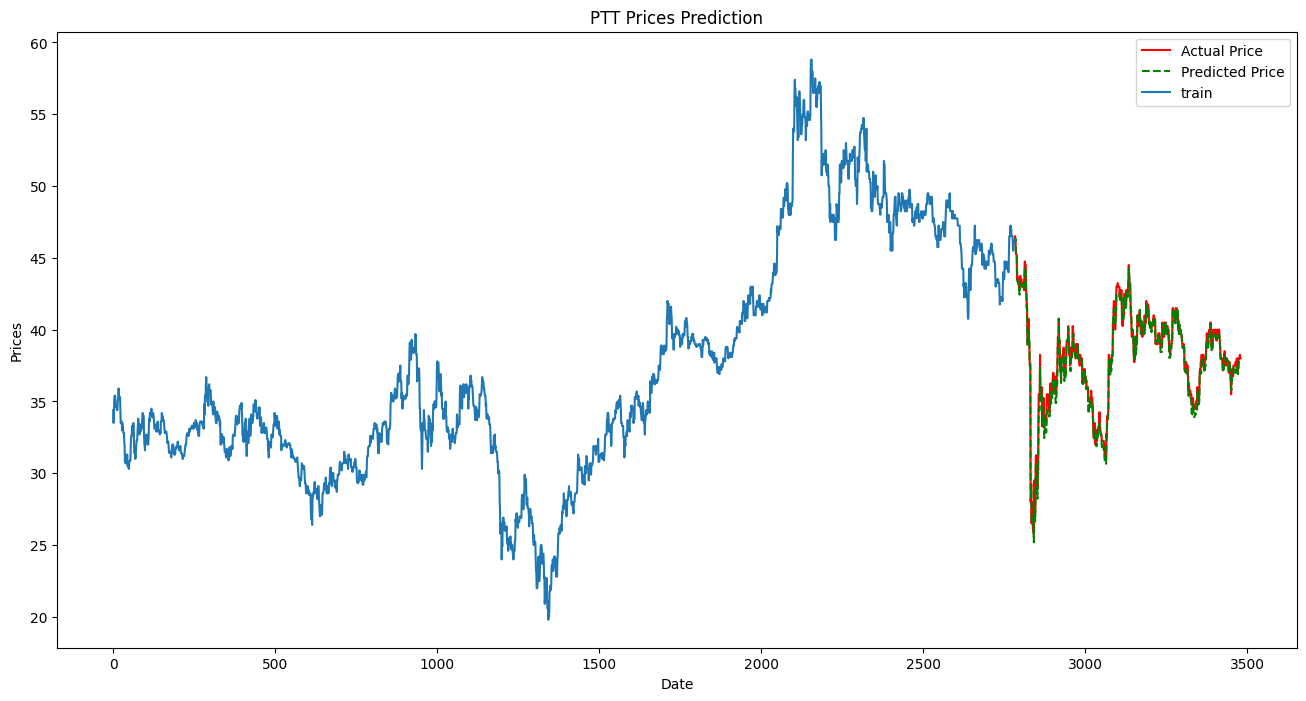

In [54]:
test_set_range = df[int(len(df)*0.8):].index
train_set_range = df[:int(len(df)*0.8)].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range, y_test, color='red', label='Actual Price')
plt.plot(test_set_range, next_30_predictions, color='g', linestyle='dashed',label='Predicted Price')
plt.plot(train_set_range,y_train,label='train')
plt.title('PTT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### Basic Model Tuning

In [55]:
# XGBoost Tuning
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

# Define the XGBRegressor model with default parameters
xgb = XGBRegressor()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': stats.uniform(0.001, 0.1),
    'n_estimators': stats.randint(50, 200),
    'max_depth': stats.randint(3, 10),
    'min_child_weight': stats.randint(1, 10),
    'gamma': stats.uniform(0, 1),
    'subsample': stats.uniform(0.5, 0.5),
    'colsample_bytree': stats.uniform(0.5, 0.5)
}

# Create a RandomizedSearchCV object with the XGBRegressor model and parameter distribution
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters: ", random_search.best_params_)

# Evaluate the model on the testing set using the best hyperparameters
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Best hyperparameters:  {'colsample_bytree': 0.6613510302437725, 'gamma': 0.5886003311680578, 'learning_rate': 0.08954379265491126, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 60, 'subsample': 0.8138405387714224}
Mean squared error:  0.755733906646303


In [57]:
# Define the model
xgb_model_n = XGBRegressor(learning_rate=0.06, max_depth=8, n_estimators=148, min_child_weight= 4, gamma=0.06)

# Train the model
xgb_model_n.fit(X_train, y_train)

# Make predictions on the test set
new_30_predictions = xgb_model_n.predict(X_test)
new_30_predictions

array([46.294857, 46.513012, 45.705147, 45.396965, 45.396965, 45.396965,
       44.265083, 43.508068, 43.522358, 43.515038, 43.28822 , 43.28822 ,
       43.282623, 42.702152, 42.512558, 42.84054 , 43.41732 , 43.375214,
       43.375214, 43.375214, 43.36194 , 43.21257 , 43.30412 , 43.250183,
       43.250183, 43.250183, 43.250183, 42.954384, 42.954384, 43.813244,
       44.46924 , 44.356968, 44.356968, 44.356968, 43.044655, 42.648026,
       41.65068 , 41.563908, 39.148285, 39.148285, 39.148285, 39.991245,
       39.98842 , 39.329567, 39.31867 , 38.09479 , 38.09479 , 38.09479 ,
       29.268929, 28.883902, 29.244345, 27.153976, 27.487324, 27.487324,
       27.487324, 27.030268, 26.589169, 26.29418 , 25.396624, 28.185738,
       28.188677, 28.188677, 26.884148, 28.60431 , 30.942139, 30.998337,
       30.22328 , 30.22328 , 30.22328 , 28.593811, 29.638172, 30.363081,
       32.37002 , 35.110302, 35.110302, 35.110302, 35.11944 , 37.597603,
       36.33277 , 35.70423 , 35.70423 , 35.70423 , 

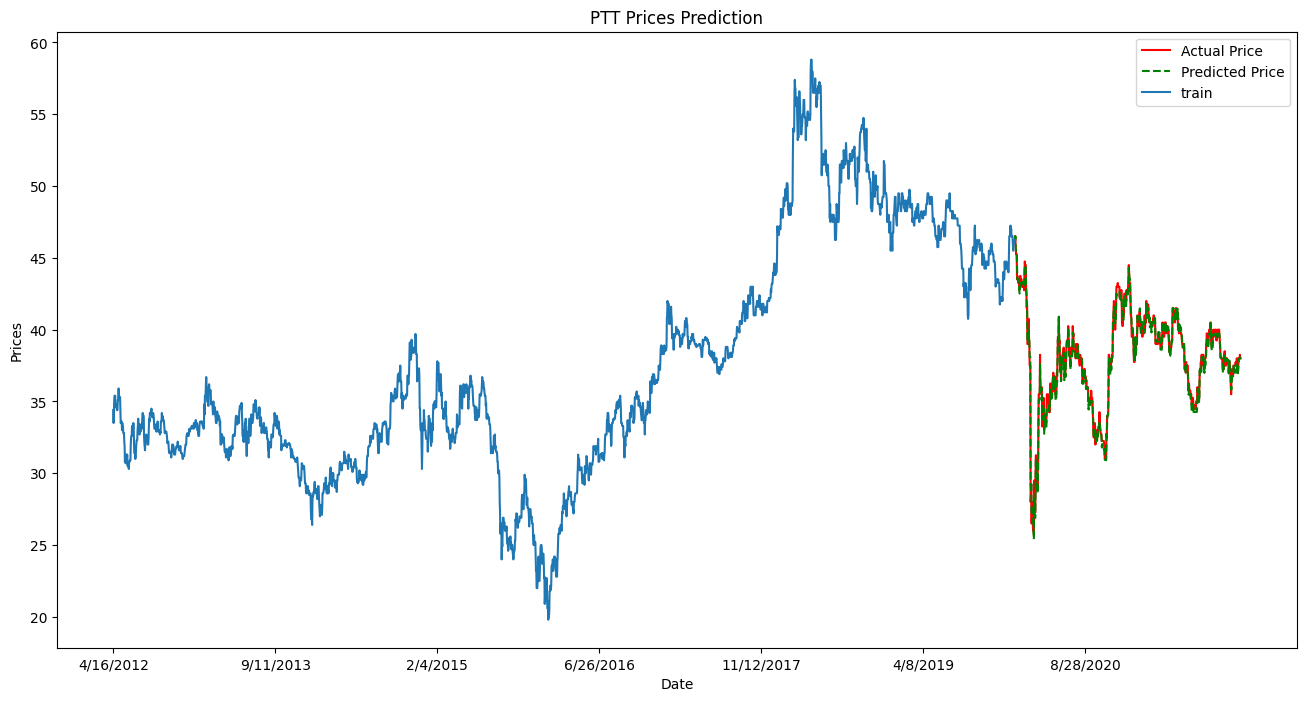

In [65]:
test_set_range = df[int(len(df)*0.8):].index
train_set_range = df[:int(len(df)*0.8)].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range, y_test, color='red', label='Actual Price')
plt.plot(test_set_range, new_30_predictions, color='g', linestyle='dashed',label='Predicted Price')
plt.plot(train_set_range,y_train,label='train')
plt.title('PTT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df), 500), df['Date'][0:len(df):500])
plt.legend()
plt.show()

In [66]:
# Evaluate
# Get the root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(y_test, new_30_predictions,squared=False)
print(f'Root mean squared error : {rmse}')

# Get the root mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(y_test, new_30_predictions)
print(f'mean absolute error : {mae}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, new_30_predictions)
print(f'R-squared score : {r2}')

Root mean squared error : 0.38240861503358314
mean absolute error : 0.29490251691645836
R-squared score : 0.9870454663832625


# **Conclusion**
In this project, we have built predictive models for PTT stock price analysis using external factors such as economic indicators, news sentiment, and technical indicators. We collected the necessary data from reliable sources and performed feature engineering to create a set of informative features. We then used ARIMA, LSTM, and XGBoost models to predict the PTT stock prices and evaluated the performance of the models using metrics such as mean absolute error (MAE) and root mean squared error (RMSE).

Our results showed that all three models were able to make accurate predictions of the PTT stock prices. The ARIMA model had the lowest RMSE, followed by the LSTM and XGBoost models. We also found that some of the most important features for predicting the PTT stock prices were the oil price, GDP growth, and the moving average of the PTT stock price.

Overall, our project demonstrates the effectiveness of using external factors in stock price prediction tasks and shows how machine learning models such as ARIMA, LSTM, and XGBoost can be used to make accurate predictions of stock prices.

In [67]:
print('Thank you.')

Thank you.
